<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/analise_cluster_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando kmeans para análise de cluster

Aqui será usado os atributos nome,categorias, marcas e condições para fazer a análise de cluser usando o algoritmo kmeans, e verificar se esse algoritmo funciona nesse dataset.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [52]:
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de train_data (1).csv')
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,date,stock,item_description
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,15-6-2018,2,size small euc excellent used condition kimchi...
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,12-12-2018,1,new men s rbx performance boxer brief size lar...
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,13-5-2018,11,piece decor bundle beautiful rustic teal blue ...
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,24-2-2018,4,iphone kate spade case new never used was a gi...
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,29-10-2018,11,silpada new necklace sterling silver pearl bra...


In [53]:
mercari_sel = mercari[['category_1','category_2','category_3',
                       'brand_name','item_condition_id','shipping']]

In [54]:
mercari_sel.head()

,category_1,category_2,category_3,brand_name,item_condition_id,shipping
0,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",No Brand,1,1
1,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",No Brand,1,1
2,Women,Athletic Apparel,Shirts & Tops,Under Armour,2,1
3,Women,Athletic Apparel,Shorts,Nike,3,1
4,Beauty,Makeup,Eyes,No Brand,3,0


In [55]:
mercari_sel.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [56]:
le = LabelEncoder()
le.fit(mercari_sel['category_1'])
mercari_sel['category_1'] = le.transform(mercari_sel['category_1'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
le.fit(mercari_sel['category_2'])
mercari_sel['category_2'] = le.transform(mercari_sel['category_2'])

le.fit(mercari_sel['category_3'])
mercari_sel['category_3'] = le.transform(mercari_sel['category_3'])

le.fit(mercari_sel['brand_name'])
mercari_sel['brand_name'] = le.transform(mercari_sel['brand_name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [58]:
x = StandardScaler().fit_transform(mercari_sel)

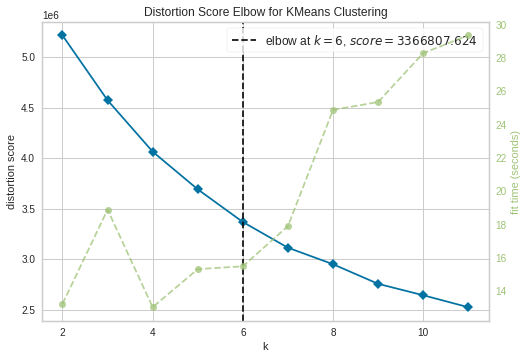

In [59]:
# Aplicando o método do cotovelo
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(x)
visualizer.show()

In [61]:
kmean = KMeans(n_clusters=6).fit(x)

In [110]:
kmean2 = KMeans(n_clusters=5).fit(mercari[['price','item_condition_id']])

In [62]:
mercari['cluster'] = kmean.labels_

In [119]:
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,date,stock,item_description,cluster
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,15-6-2018,2,size small euc excellent used condition kimchi...,2
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,12-12-2018,1,new men s rbx performance boxer brief size lar...,2
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,13-5-2018,11,piece decor bundle beautiful rustic teal blue ...,1
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,24-2-2018,4,iphone kate spade case new never used was a gi...,1
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,29-10-2018,11,silpada new necklace sterling silver pearl bra...,5


In [64]:
mercari.groupby('cluster').mean().reset_index()

,cluster,item_condition_id,price,shipping,stock
0,0,1.779302,24.309376,1.000000,11.778418
1,1,2.079456,27.596091,0.328286,11.787039
2,2,1.461463,18.388835,1.000000,11.817133
3,3,2.170177,32.350437,0.345403,11.758241
4,4,2.130498,30.906513,0.000157,11.761621
5,5,1.927050,28.934565,0.001051,11.781439


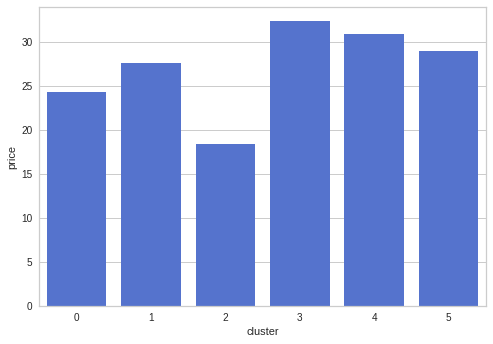

In [65]:
sns.barplot(x='cluster',y='price',data=mercari.groupby('cluster').mean().reset_index(),
            color='royalblue')

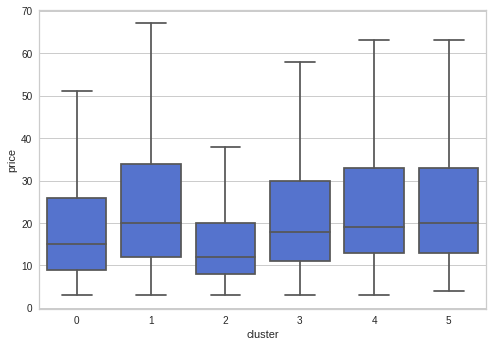

In [66]:
sns.boxplot(x='cluster',y='price',data=mercari,showfliers=False,color='royalblue')

(0.0, 2109.3)

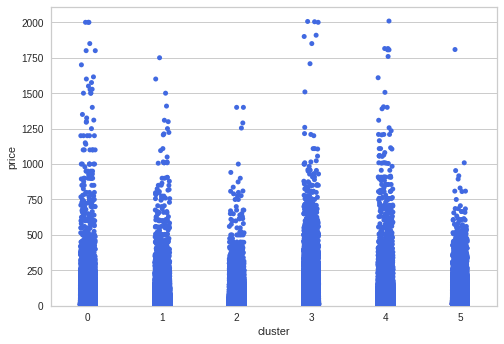

In [67]:
sns.stripplot(x='cluster',y='price',data=mercari,color='royalblue')
plt.ylim(bottom=0)

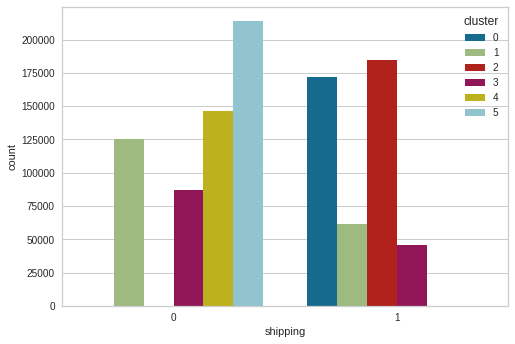

In [68]:
sns.countplot(x='shipping',data=mercari,hue='cluster')

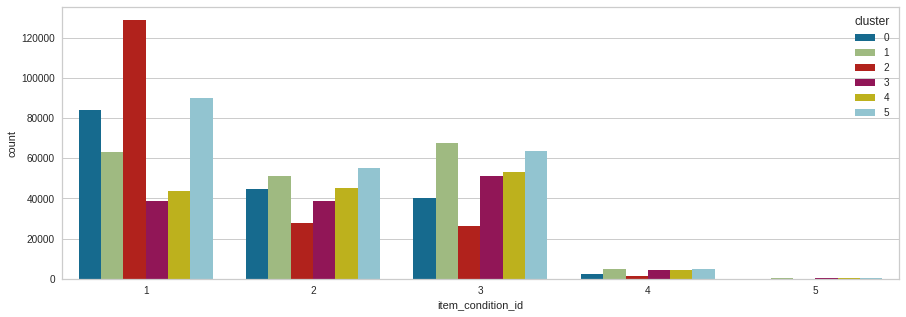

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x='item_condition_id',data=mercari,hue='cluster')

## Analisando o cluster 0

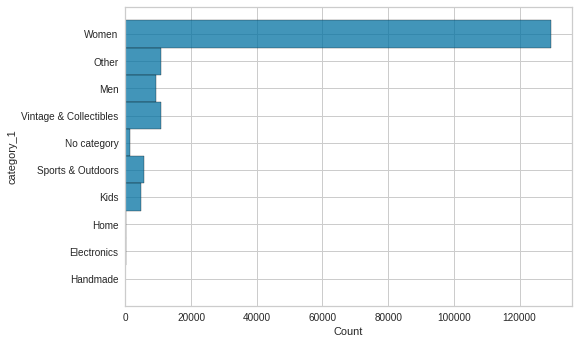

In [70]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==0])

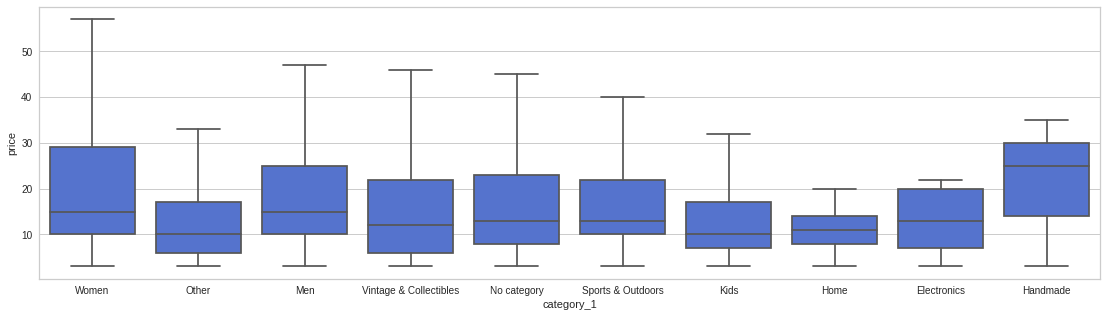

In [71]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==0],showfliers=False,color='royalblue')

(0.0, 2099.85)

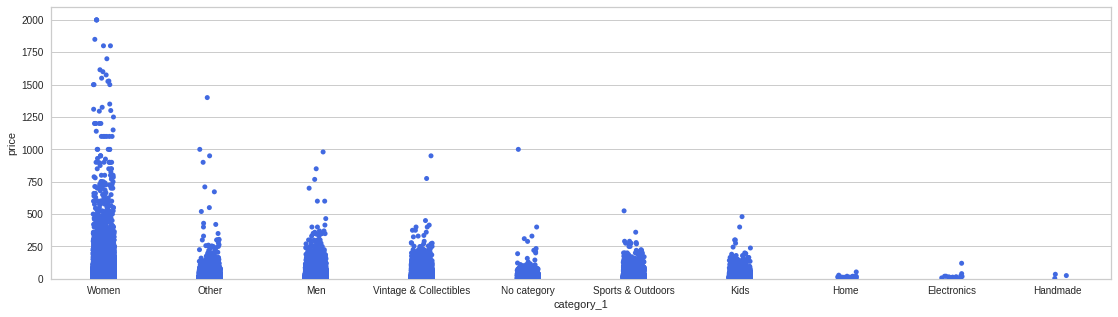

In [72]:
plt.figure(figsize=(19,5))
sns.stripplot(x='category_1',y='price',data=mercari[mercari['cluster']==0],color='royalblue')
plt.ylim(bottom=0)

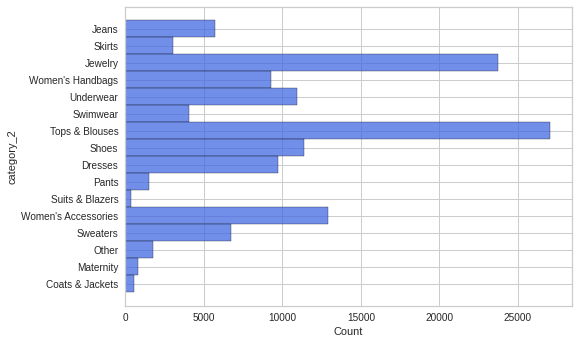

In [73]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Women')],
             color='royalblue')

In [89]:
mercari[mercari['cluster']==0]['brand_name'].value_counts()

No Brand             85387
PINK                 10091
Victoria's Secret     8601
LuLaRoe               7847
Michael Kors          2872
                     ...  
Joyce Leslie             1
Royal Apparel            1
Victorious               1
Preggers                 1
Susan Bristol            1
Name: brand_name, Length: 1743, dtype: int64

<BarContainer object of 30 artists>

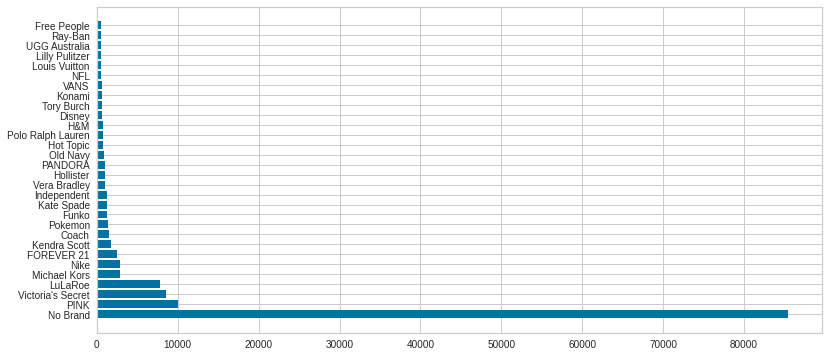

In [98]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==0]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==0]['brand_name'].value_counts()[0:30])

## Analisando o cluster 1

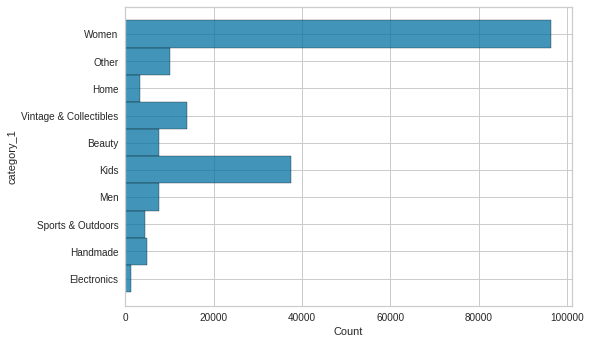

In [74]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==1])

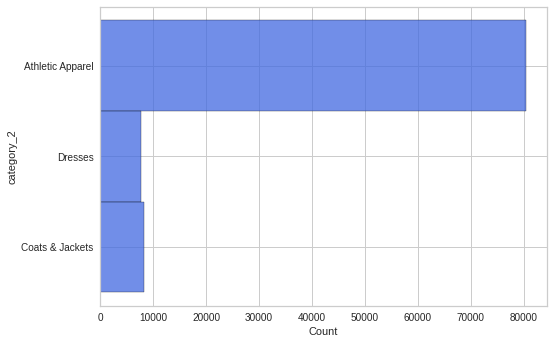

In [105]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==1) & (mercari['category_1']=='Women')],
             color='royalblue')

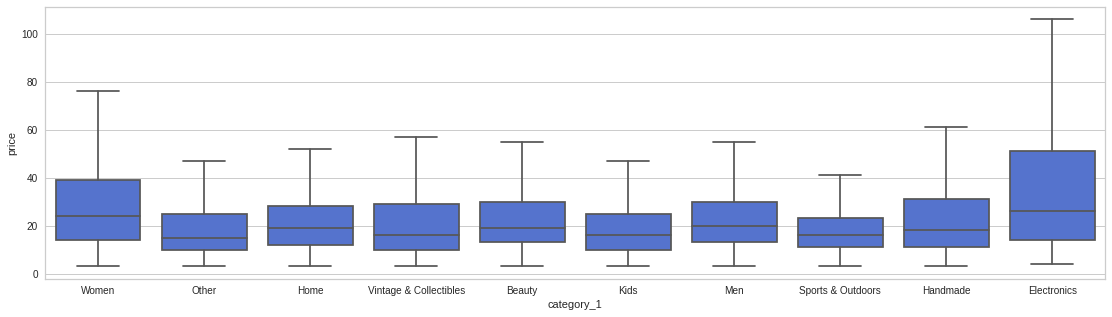

In [75]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==1],showfliers=False,color='royalblue')

(0.0, 1837.35)

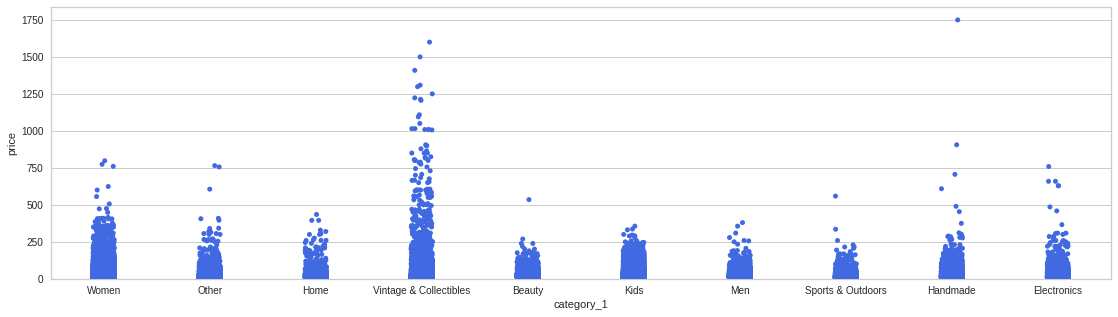

In [76]:
plt.figure(figsize=(19,5))
sns.stripplot(x='category_1',y='price',data=mercari[mercari['cluster']==1]
            ,color='royalblue')
plt.ylim(bottom=0)

In [90]:
mercari[mercari['cluster']==1]['brand_name'].value_counts()

No Brand         86382
Nike             19614
PINK             11420
Lululemon         8779
LuLaRoe           8364
                 ...  
Streamlight®         1
Ruehl No. 925        1
Sue Wong             1
Infinity             1
Double Zero          1
Name: brand_name, Length: 1439, dtype: int64

<BarContainer object of 30 artists>

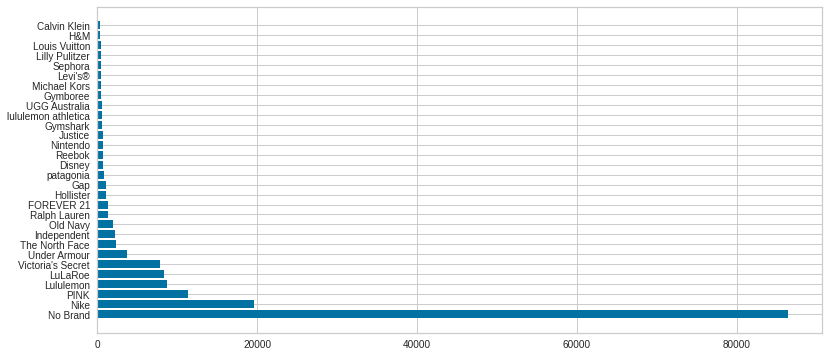

In [99]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==1]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==1]['brand_name'].value_counts()[0:30])

## Analisando o cluster 2

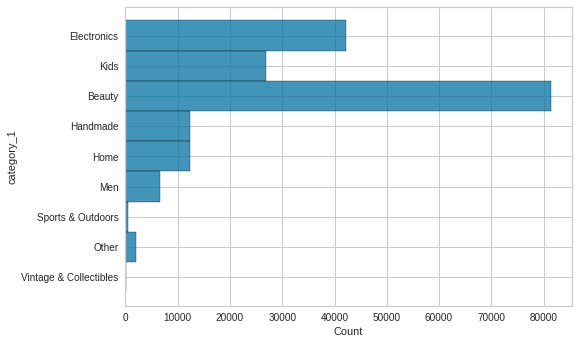

In [77]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==2])

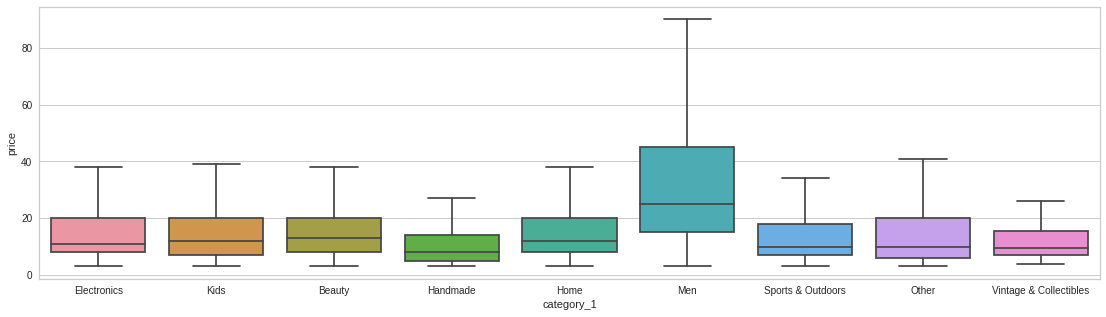

In [78]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==2],showfliers=False)

(0.0, 1469.85)

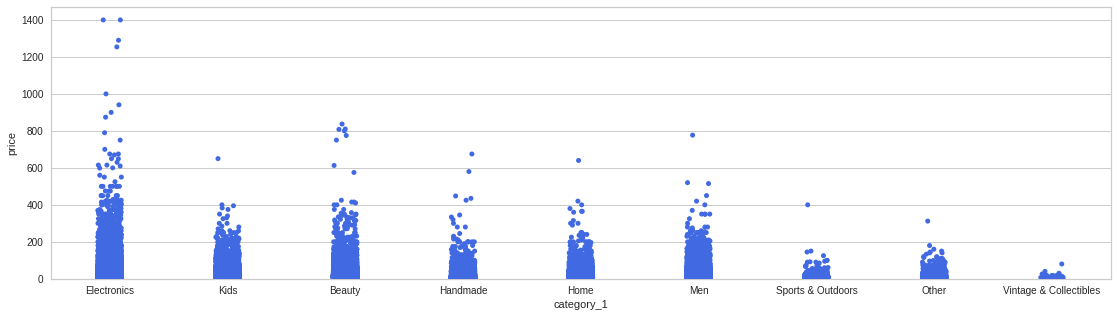

In [79]:
plt.figure(figsize=(19,5))
sns.stripplot(x='category_1',y='price',data=mercari[mercari['cluster']==2]
            ,color='royalblue')
plt.ylim(bottom=0)

In [91]:
mercari[mercari['cluster']==2]['brand_name'].value_counts()

No Brand             116701
Sephora                5057
Nintendo               4734
Sony                   2549
Victoria's Secret      2492
                      ...  
Quartet                   1
deborah lippmann          1
T-fal                     1
Stanley                   1
Levana                    1
Name: brand_name, Length: 1013, dtype: int64

<BarContainer object of 30 artists>

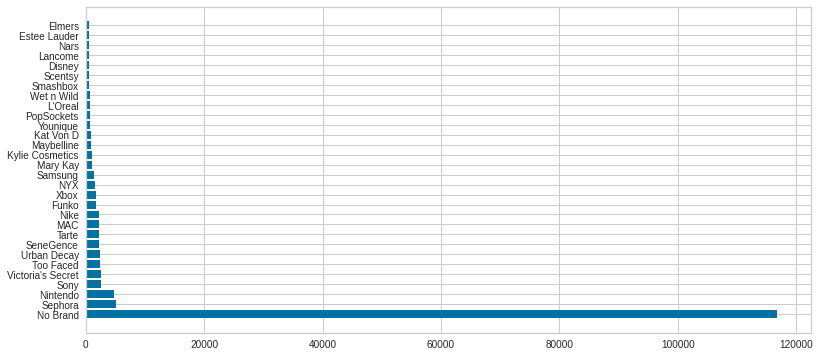

In [100]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==2]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==2]['brand_name'].value_counts()[0:30])

## Analisando o cluster 3

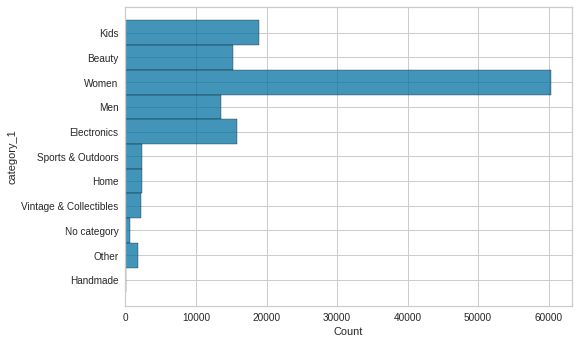

In [80]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==3])

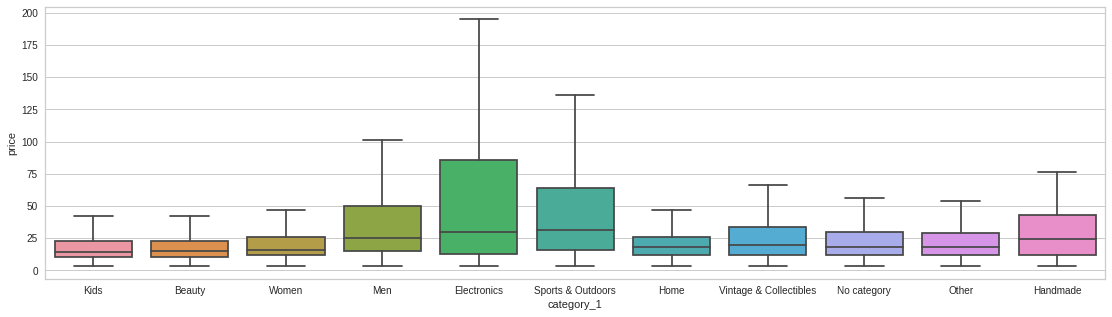

In [81]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==3],showfliers=False)

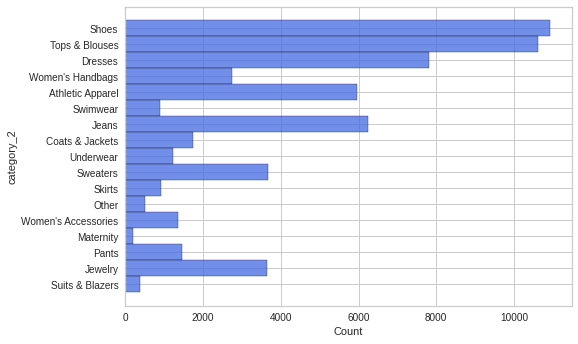

In [82]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==3) & (mercari['category_1']=='Women')],
             color='royalblue')

In [92]:
mercari[mercari['cluster']==3]['brand_name'].value_counts()

Apple                12162
American Eagle        9307
Bath & Body Works     7149
Adidas                7109
Disney                4479
                     ...  
Gypsy 05                 1
Calypso St. Barth        1
Bubblegum                1
Colorbok                 1
De La Mer                1
Name: brand_name, Length: 1575, dtype: int64

<BarContainer object of 30 artists>

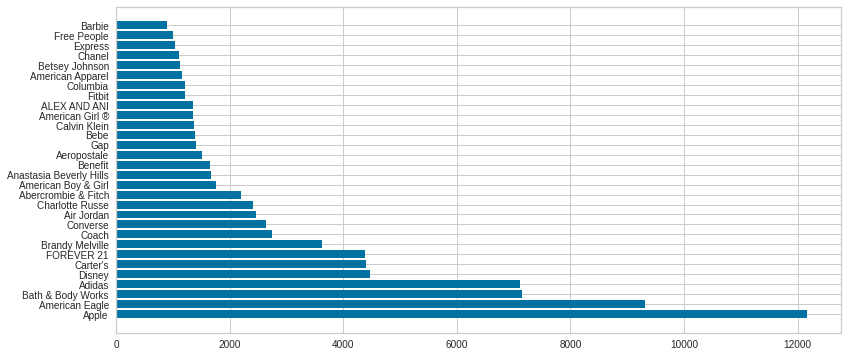

In [101]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==3]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==3]['brand_name'].value_counts()[0:30])

## Analisando o cluster 4

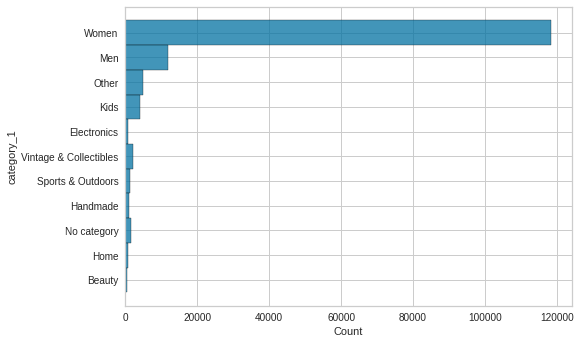

In [83]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==4])

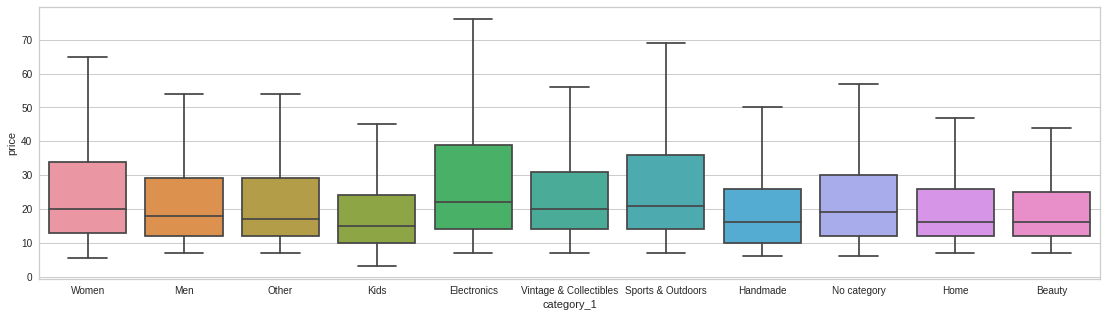

In [84]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==4],showfliers=False)

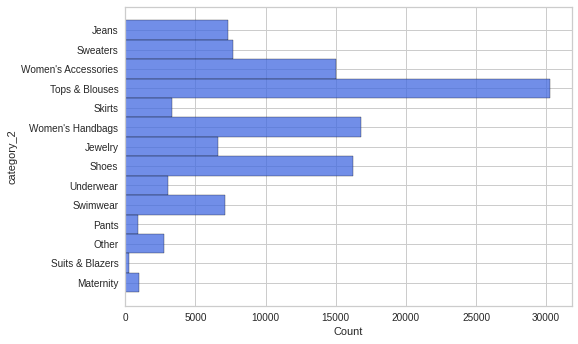

In [85]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==4) & (mercari['category_1']=='Women')],
             color='royalblue')

In [93]:
mercari[mercari['cluster']==4]['brand_name'].value_counts()

No Brand             55176
PINK                 12415
Victoria's Secret     7578
Michael Kors          5617
LuLaRoe               4076
                     ...  
Evie                     1
Hot Sox                  1
dreambaby                1
Ektelon                  1
Eighty Eight             1
Name: brand_name, Length: 1730, dtype: int64

<BarContainer object of 30 artists>

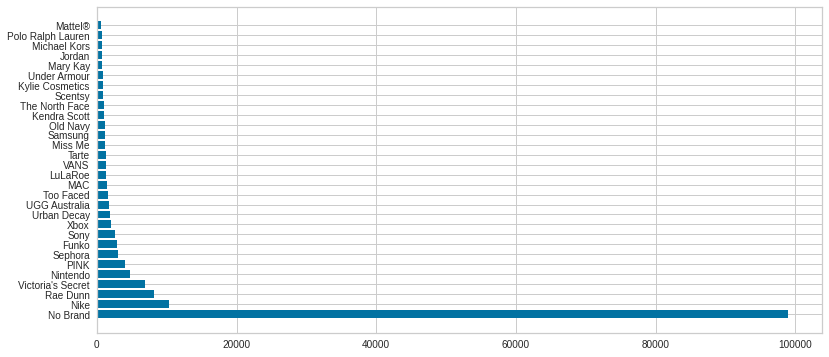

In [102]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==5]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==5]['brand_name'].value_counts()[0:30])

## Analisando o cluster 5

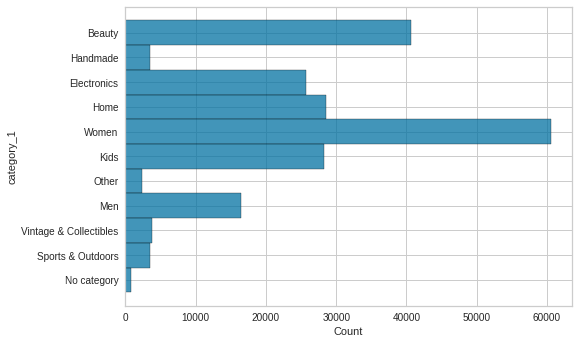

In [86]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==5])

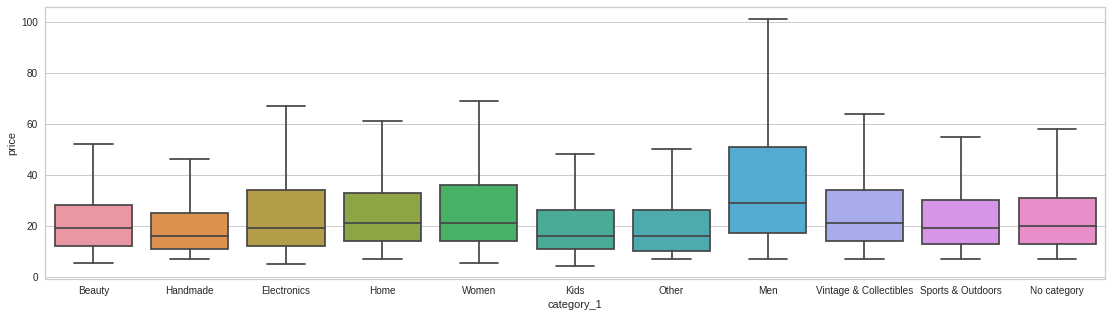

In [87]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==5],showfliers=False)

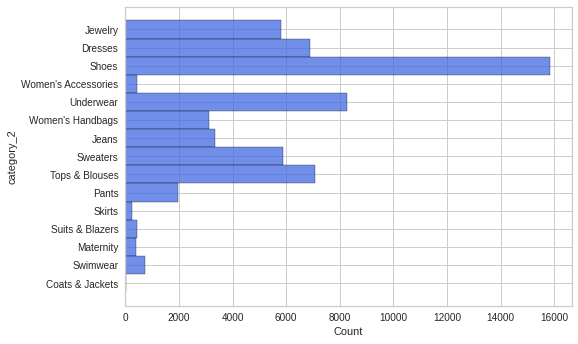

In [88]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==5) & (mercari['category_1']=='Women')],
             color='royalblue')

In [94]:
mercari[mercari['cluster']==5]['brand_name'].value_counts()

No Brand             98890
Nike                 10330
Rae Dunn              8170
Victoria's Secret     6918
Nintendo              4794
                     ...  
Savannah                 1
Tecnica                  1
T&J Designs              1
Just Cavalli             1
Sheffield Knives         1
Name: brand_name, Length: 1834, dtype: int64

<BarContainer object of 30 artists>

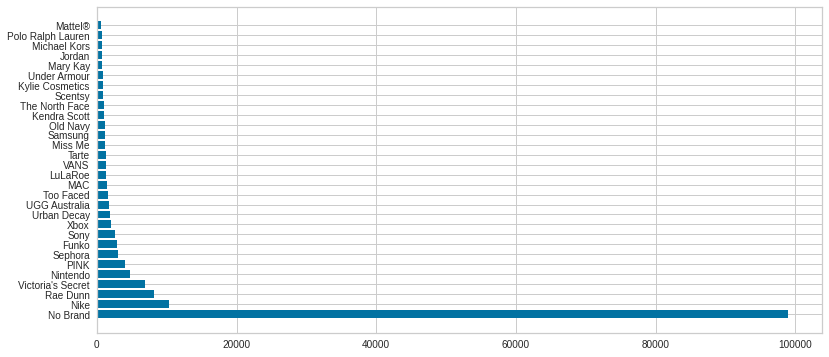

In [103]:
plt.figure(figsize=(13,6))
plt.barh(mercari[mercari['cluster']==5]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==5]['brand_name'].value_counts()[0:30])